In [86]:
#############
#b)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

energy_test = pd.read_csv('./energy_test.csv')
energy_train = pd.read_csv('./energy_train.csv')
energy_val = pd.read_csv('./energy_val.csv')

#print(energy_test,energy_train,energy_val)
#print(energy_test.shape[1])
#b)
def preprocess_data(train, val, test,target_column):
  train = train.dropna()
  val = val.dropna()
  test = test.dropna()

  trainy = train[[target_column]] #Only appliances
  valy = val[[target_column]]
  testy = test[[target_column]]

  trainx = train.select_dtypes(include=['int', 'float']).drop(columns=[target_column]) #keep columns that are not target and that are numeric
  valx = val.select_dtypes(include=['int', 'float']).drop(columns=[target_column])
  testx = test.select_dtypes(include=['int', 'float']).drop(columns=[target_column])


  scaler = preprocessing.StandardScaler().fit(trainx) #We fit to the training set to be consistent
  trainx_scaled = scaler.transform(trainx)
  valx_scaled = scaler.transform(valx)
  testx_scaled = scaler.transform(testx)

  return trainx_scaled, valx_scaled, testx_scaled, trainy, valy, testy

target_column = 'Appliances'
trainx, valx, testx, trainy, valy, testy = preprocess_data(energy_train,energy_val,energy_test,target_column)





In [87]:
#############
#c)
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


def eval_linear1(data = [trainx, trainy, valx, valy, testx, testy]):
  metrics = dict({'train-rmse': None, 'train-r2':None,
                  'val-rmse': None, 'val-r2':None, 'test-rmse':None, 'test-r2': None})

  # Train on the training set
  model = LinearRegression().fit(data[0],data[1])

  # Get metrics for all the datasets
  for i,name in zip(range(0, 6, 2), ['train', 'val', 'test']):
    y_pred = model.predict(data[i])
    rmse = root_mean_squared_error(data[i+1], y_pred)
    r_2 = r2_score(data[i+1], y_pred)

    metrics[f'{name}-rmse'] = rmse
    metrics[f'{name}-r2'] = r_2

  return metrics


metrics_LR = eval_linear1(data = [trainx, trainy, valx, valy, testx, testy])
print(metrics_LR)


{'train-rmse': 98.23103848878637, 'train-r2': 0.18675401399493108, 'val-rmse': 97.53986578772171, 'val-r2': 0.0026790084850940588, 'test-rmse': 100.03023430387994, 'test-r2': -0.21168451232274}


In [88]:
#############
#d)
from sklearn.linear_model import Ridge

def eval_ridge(data = [trainx, trainy, valx, valy, testx, testy], alpha=1):

  # Train on the training set
  model = Ridge(alpha=alpha,max_iter=10000)
  model.fit(data[0],data[1])
  return model

alpha = 0.5
model = eval_ridge(data = [trainx, trainy, valx, valy, testx, testy], alpha = alpha)



In [89]:
#############
#e)
from sklearn.linear_model import Lasso

def eval_lasso(data = [trainx, trainy, valx, valy, testx, testy], alpha=1):
  # Train on the training set
  model = Lasso(alpha=alpha,max_iter=10000)
  model.fit(data[0],data[1])
  return model


alpha = 0.5
model = eval_lasso(data = [trainx, trainy, valx, valy, testx, testy], alpha = alpha)


In [90]:
#############
#
n_alphas = 30
alphas = np.logspace(-3, 5, n_alphas)

table_ridge = []
table_lasso = []

#to plot in the next exercise
coefs_ridge = []
coefs_lasso = []

data = [trainx, trainy, valx, valy, testx, testy]
for alpha in alphas:
  #First Ridge
  model = eval_ridge(data = [trainx, trainy, valx, valy, testx, testy], alpha = alpha)
  coefs_ridge.append(model.coef_)
  values = []
  # Get metrics for all the datasets
  for i in range(0, 6, 2):
    y_pred = model.predict(data[i])
    rmse = root_mean_squared_error(data[i+1], y_pred)
    r_2 = r2_score(data[i+1], y_pred)
    values.append(rmse)
    values.append(r_2)

  table_ridge.append(values)

  #Second Lasso
  model = eval_lasso(data = [trainx, trainy, valx, valy, testx, testy], alpha = alpha)
  coefs_lasso.append(model.coef_)
  values = []
  # Get metrics for all the datasets
  for i in range(0, 6, 2):
    y_pred = model.predict(data[i])
    rmse = root_mean_squared_error(data[i+1], y_pred)
    r_2 = r2_score(data[i+1], y_pred)
    values.append(rmse)
    values.append(r_2)

  table_lasso.append(values)


# Define column names
column_names = ['train-rmse', 'train-r2', 'val-rmse', 'val-r2', 'test-rmse', 'test-r2']

# Create a pandas DataFrame
df_ridge = pd.DataFrame(table_ridge, columns=column_names)
df_lasso = pd.DataFrame(table_lasso, columns=column_names)

# Add a column for alpha values
df_ridge.insert(0, 'alpha', alphas)
df_lasso.insert(0, 'alpha', alphas)

print(df_ridge)
print(df_lasso)



            alpha  train-rmse  train-r2   val-rmse    val-r2   test-rmse  \
0        0.001000   98.231038  0.186754  97.539937  0.002678  100.030398   
1        0.001887   98.231038  0.186754  97.540000  0.002676  100.030543   
2        0.003562   98.231038  0.186754  97.540118  0.002674  100.030817   
3        0.006723   98.231039  0.186754  97.540343  0.002669  100.031335   
4        0.012690   98.231039  0.186754  97.540766  0.002661  100.032312   
5        0.023950   98.231039  0.186754  97.541564  0.002644  100.034155   
6        0.045204   98.231039  0.186754  97.543070  0.002613  100.037633   
7        0.085317   98.231042  0.186754  97.545910  0.002555  100.044194   
8        0.161026   98.231050  0.186754  97.551263  0.002446  100.056566   
9        0.303920   98.231079  0.186753  97.561334  0.002240  100.079865   
10       0.573615   98.231177  0.186752  97.580198  0.001854  100.123582   
11       1.082637   98.231491  0.186747  97.615155  0.001139  100.204803   
12       2.0

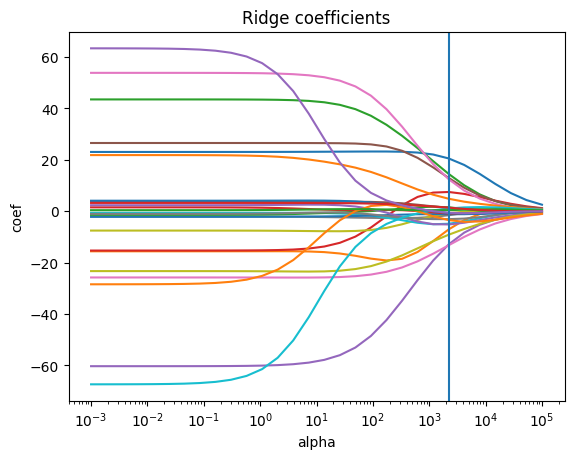

In [ ]:
#############
#g)
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.xlabel("alpha")
plt.ylabel("coef")
plt.axvline(2212)
plt.title("Ridge coefficients")
plt.show()

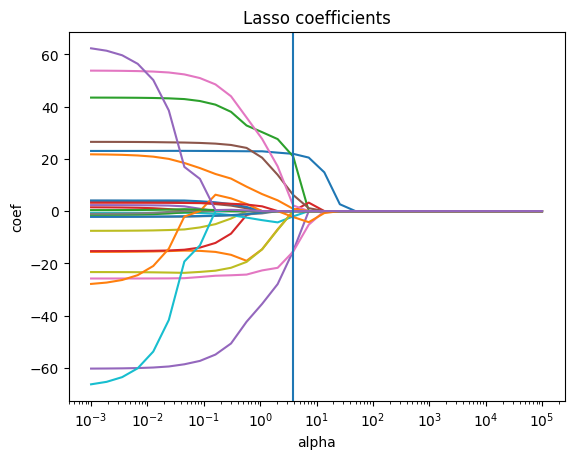

In [ ]:

ax = plt.gca()

ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel("alpha")
plt.ylabel("coef")
plt.axvline(3.856)
plt.title("Lasso coefficients")
plt.show()

In [97]:
import random
from sklearn.metrics import mean_squared_error


def train(trainx,trainy):
  data = np.column_stack([trainy,trainx])
  loss_per_epoch = {}
  B = round(len(trainy)/BATCH_SIZE)+1 #number of batches
  betas = np.zeros(trainx.shape[1]) #Initial betas values
  for epoch in range(MAX_EPOCHS):
    np.random.shuffle(data)
    batches = np.array_split(data, B) #Split the data
    for batch in batches:
      batchx = batch[:,1:]
      batchy = batch[:,0]
      y_pred= np.dot(batchx, betas.T)

      E = (batchy-y_pred)# error
      #gradients and average it
      gradients = - 2 * np.dot(batchx.T, E) / len(batchy) + 2 * LAMBDA * betas
      #update the parameters on the gradient
      betas = betas - LEARNING_RATE * gradients

    y_pred= np.dot(trainx, betas.T)
    loss = mean_squared_error(trainy, y_pred)
    loss_per_epoch[epoch+ 1] = loss
  return loss_per_epoch

MAX_EPOCHS = 1000
BATCH_SIZE = 2048
LAMBDA =2212

datax = np.vstack((trainx, valx, testx))
datay = np.vstack([trainy, valy, testy])

LEARNING_RATE = 0.000001
loss_per_epoch_0_000001=train(datax,datay)
LEARNING_RATE = 0.00001
loss_per_epoch_0_00001=train(datax,datay)
LEARNING_RATE = 0.000012
loss_per_epoch_0_000012=train(datax,datay)
LEARNING_RATE = 0.000015
loss_per_epoch_0_000015=train(datax,datay)





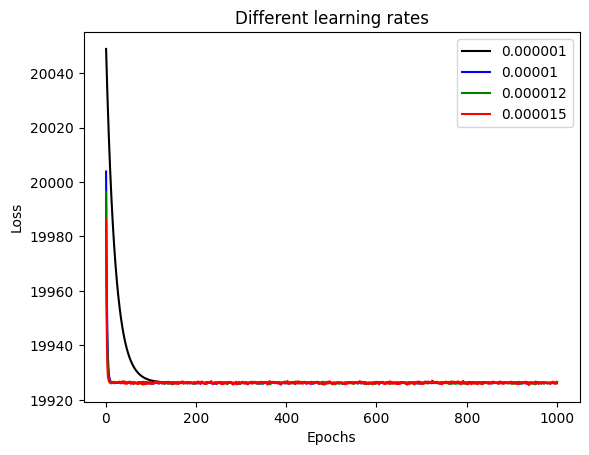

In [111]:
x = list(loss_per_epoch_0_000001.keys())
y = list(loss_per_epoch_0_000001.values())
plt.plot(x, y, color='black', label='0.000001')

y = list(loss_per_epoch_0_00001.values())
plt.plot(x, y, color='b', label='0.00001')

y = list(loss_per_epoch_0_000012.values())
plt.plot(x, y, color='green', label='0.000012')

y = list(loss_per_epoch_0_000015.values())
plt.plot(x, y, color='red', label='0.000015')




# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Different learning rates')

# Show the plot
plt.show()

In [112]:
#
MAX_EPOCHS = 1000
LAMBDA =2212
LEARNING_RATE = 0.000001

datax = np.vstack((trainx, valx, testx))
datay = np.vstack([trainy, valy, testy])


BATCH_SIZE = 4096
loss_per_epoch_4096=train(datax,datay)
BATCH_SIZE = 2048
loss_per_epoch_2048=train(datax,datay)
BATCH_SIZE = 512
loss_per_epoch_512=train(datax,datay)
BATCH_SIZE = 128
loss_per_epoch_128=train(datax,datay)
BATCH_SIZE = 64
loss_per_epoch_64=train(datax,datay)
BATCH_SIZE = 32
loss_per_epoch_32=train(datax,datay)


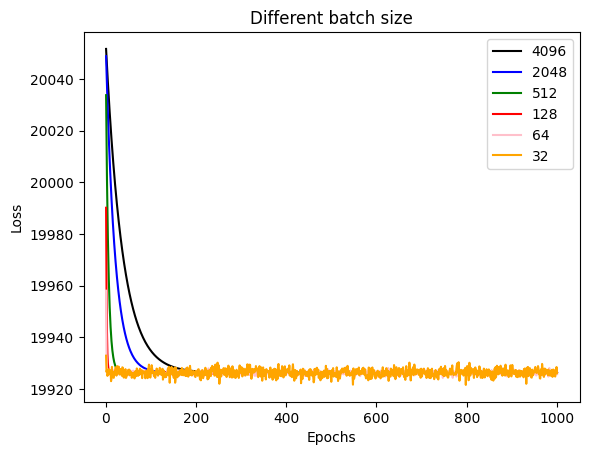

In [113]:
x = list(loss_per_epoch_4096.keys())
y = list(loss_per_epoch_4096.values())
plt.plot(x, y, color='black', label='4096')

y = list(loss_per_epoch_2048.values())
plt.plot(x, y, color='b', label='2048')

y = list(loss_per_epoch_512.values())
plt.plot(x, y, color='green', label='512')

y = list(loss_per_epoch_128.values())
plt.plot(x, y, color='red', label='128')

y = list(loss_per_epoch_64.values())
plt.plot(x, y, color='pink', label='64')

y = list(loss_per_epoch_32.values())
plt.plot(x, y, color='orange', label='32')




# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Different batch size')

# Show the plot
plt.show()